In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### preprocessing

In [2]:
df= pd.read_csv("D:/Intern/DataSets/Load_predction.csv")

In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df = df.drop(columns=['Loan_ID'], axis=1)

In [6]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
le = LabelEncoder()

for col in df.columns:
	if df[col].dtype == 'object':
		df[col] = le.fit_transform(df[col])
	if df[col].dtype == 'float64':
		df[col] = pd.to_numeric(df[col], errors='coerce')
		df[col] = df[col].fillna(df[col].median())

In [9]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [10]:
X = df.drop(columns='Loan_Status', axis=1)
y = df["Loan_Status"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [13]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


### Model

In [14]:
model = Sequential([
	Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1], )),
	Dense(32, activation='relu'),
	Dense(16, activation='relu'),
	Dense(1, activation='sigmoid')
])

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])	

In [16]:
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=50, validation_data=(X_test_scaled, y_test))

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5153 - loss: 0.7035 - val_accuracy: 0.6829 - val_loss: 0.6767
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6782 - loss: 0.6625 - val_accuracy: 0.6911 - val_loss: 0.6385
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6864 - loss: 0.6287 - val_accuracy: 0.6911 - val_loss: 0.6127
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6864 - loss: 0.6090 - val_accuracy: 0.6911 - val_loss: 0.5931
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6864 - loss: 0.5896 - val_accuracy: 0.6911 - val_loss: 0.5715
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6904 - loss: 0.5724 - val_accuracy: 0.7073 - val_loss: 0.5484
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7088 - loss: 0.5561 - val_accuracy: 0.7236 - val_loss: 0.5263
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7536 - loss: 0.5396 - val_accuracy: 0.7724 - val_loss

In [17]:
loss, acc = model.evaluate(X_test_scaled, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {acc:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8537 - loss: 0.4425 
Loss: 0.4425, Accuracy: 0.8537


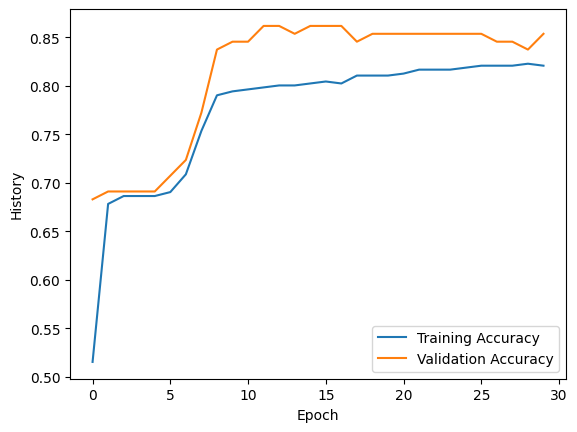

In [18]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('History')
plt.show()